In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('D:\\internship EY\\retail_data.csv')


In [4]:
print(" Shape:", df.shape)
print("\n Column Names:\n", df.columns.tolist())
print("\n Data Types:\n", df.dtypes)


 Shape: (302010, 30)

 Column Names:
 ['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']

 Data Types:
 Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amoun

In [5]:
print("\n🔹 First 5 rows:")
print(df.head())
print("\n🔹 Last 5 rows:")
print(df.tail())


🔹 First 5 rows:
   Transaction_ID  Customer_ID                 Name                Email  \
0       8691788.0      37249.0  Michelle Harrington    Ebony39@gmail.com   
1       2174773.0      69749.0          Kelsey Hill     Mark36@gmail.com   
2       6679610.0      30192.0         Scott Jensen    Shane85@gmail.com   
3       7232460.0      62101.0        Joseph Miller     Mary34@gmail.com   
4       4983775.0      27901.0        Debra Coleman  Charles30@gmail.com   

          Phone                      Address        City            State  \
0  1.414787e+09            3959 Amanda Burgs    Dortmund           Berlin   
1  6.852900e+09           82072 Dawn Centers  Nottingham          England   
2  8.362160e+09            4133 Young Canyon     Geelong  New South Wales   
3  2.776752e+09  8148 Thomas Creek Suite 100    Edmonton          Ontario   
4  9.098268e+09    5813 Lori Ports Suite 269     Bristol          England   

   Zipcode    Country  ...  Total_Amount Product_Category  Prod

In [6]:
print(df.describe(include='all').T)

                     count  unique                     top    freq  \
Transaction_ID    301677.0     NaN                     NaN     NaN   
Customer_ID       301702.0     NaN                     NaN     NaN   
Name                301628  159390           Michael Smith     144   
Email               301663   52897     Michael59@gmail.com      93   
Phone             301648.0     NaN                     NaN     NaN   
Address             301695  299329  637 Abigail Trafficway       2   
City                301762     130                 Chicago   21652   
State               301729      54                 England   63059   
Zipcode           301670.0     NaN                     NaN     NaN   
Country             301739       5                     USA   95223   
Age               301837.0     NaN                     NaN     NaN   
Gender              301693       2                    Male  187599   
Income              301720       3                  Medium  130230   
Customer_Segment    

In [8]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage (%)': missing_percent
})

In [12]:
print("\n Missing Values Report:")
print(missing_df[missing_df['Missing Values'] > 0])


 Missing Values Report:
                  Missing Values  Percentage (%)
Transaction_ID               333            0.11
Customer_ID                  308            0.10
Name                         382            0.13
Email                        347            0.11
Phone                        362            0.12
Address                      315            0.10
City                         248            0.08
State                        281            0.09
Zipcode                      340            0.11
Country                      271            0.09
Age                          173            0.06
Gender                       317            0.10
Income                       290            0.10
Customer_Segment             215            0.07
Date                         359            0.12
Year                         350            0.12
Month                        273            0.09
Time                         350            0.12
Total_Purchases              361            

In [11]:
duplicate_count = df.duplicated().sum()
print(f"\n Duplicate Rows: {duplicate_count}")



 Duplicate Rows: 4


In [13]:
print("\n Unique Values per Column:")
print(df.nunique().sort_values(ascending=False))



 Unique Values per Column:
Address             299329
Total_Amount        299305
Amount              299297
Phone               299295
Transaction_ID      294461
Name                159390
Zipcode              93978
Customer_ID          86766
Time                 83677
Email                52897
Date                   366
products               318
City                   130
State                   54
Age                     53
Product_Type            33
Product_Brand           18
Month                   12
Total_Purchases         10
Product_Category         5
Ratings                  5
Country                  5
Payment_Method           4
Order_Status             4
Feedback                 4
Income                   3
Shipping_Method          3
Customer_Segment         3
Gender                   2
Year                     2
dtype: int64


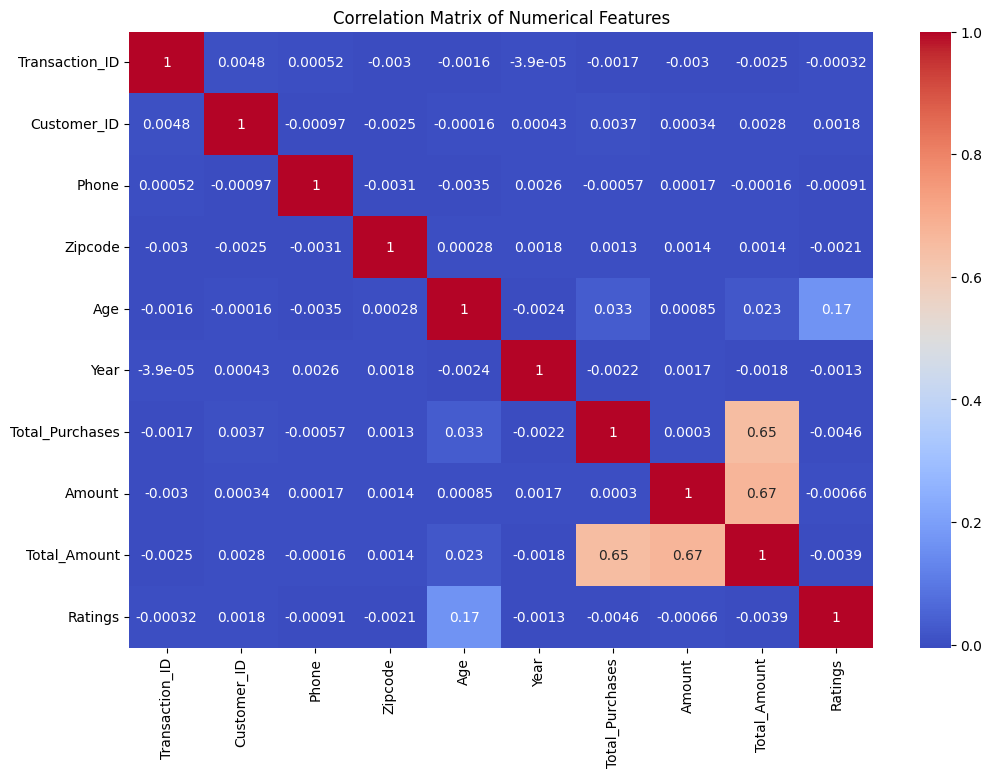

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

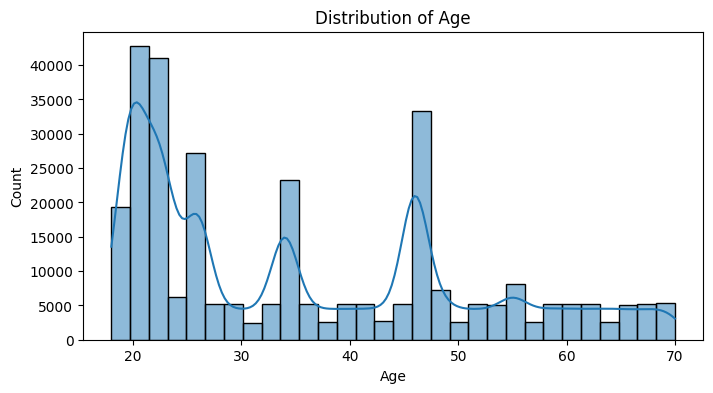

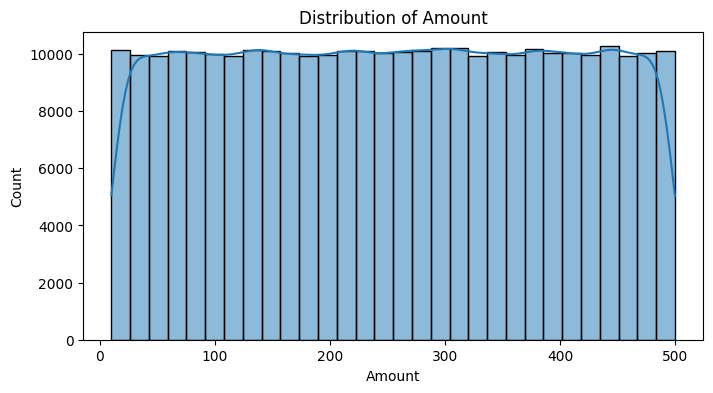

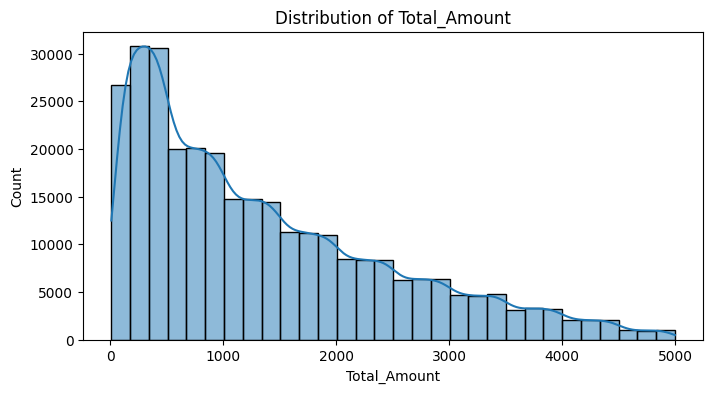

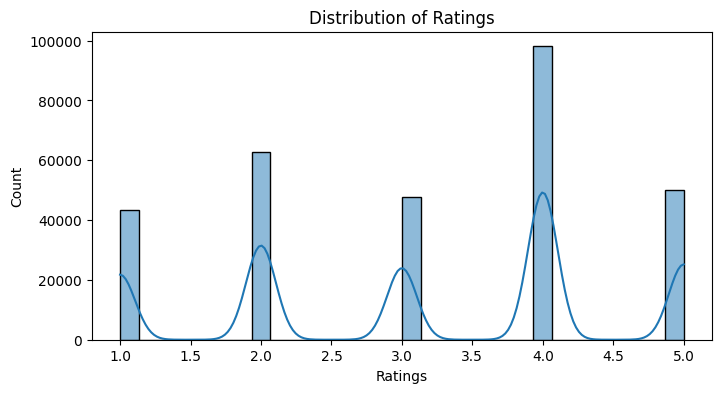

In [15]:
num_cols = ['Age', 'Amount', 'Total_Amount', 'Ratings']
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


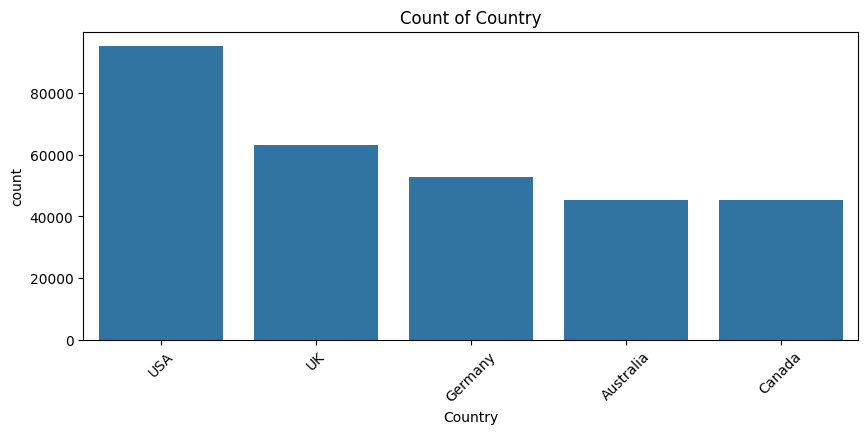

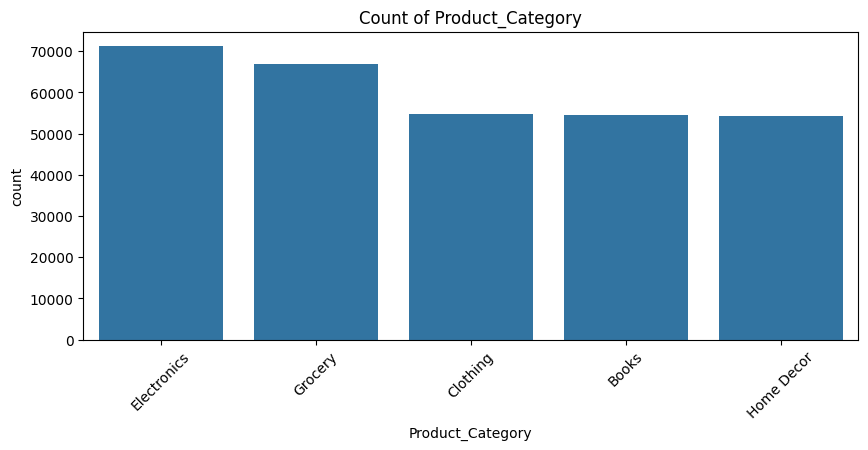

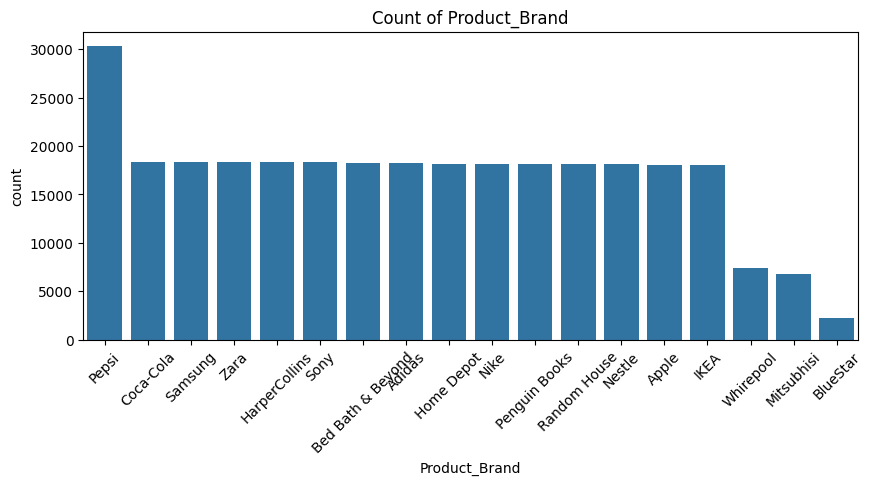

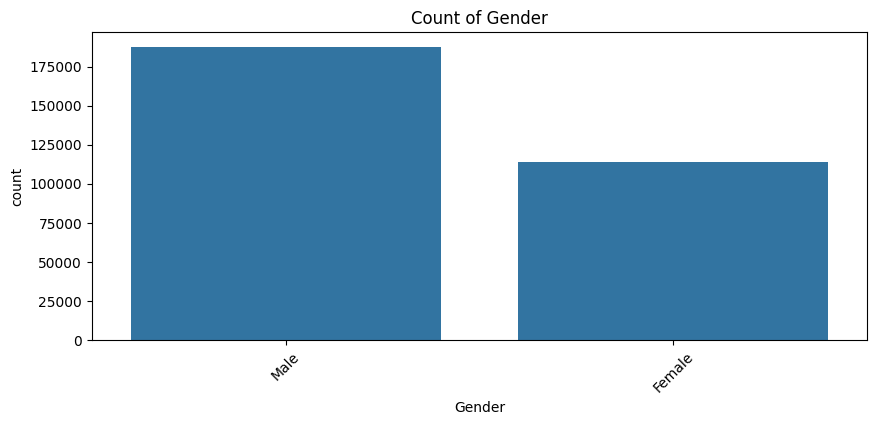

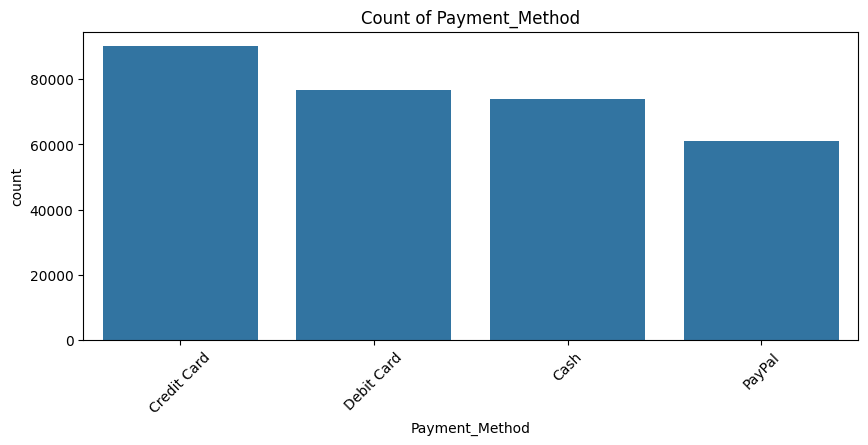

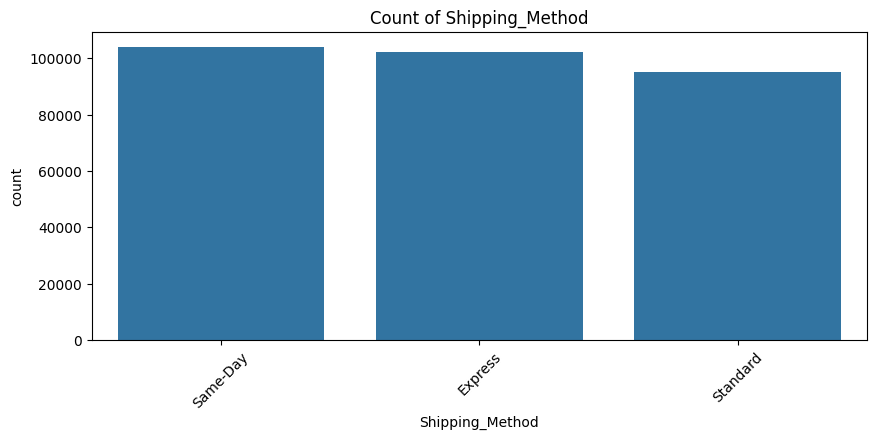

In [16]:
cat_cols = ['Country', 'Product_Category', 'Product_Brand', 'Gender', 'Payment_Method', 'Shipping_Method']
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

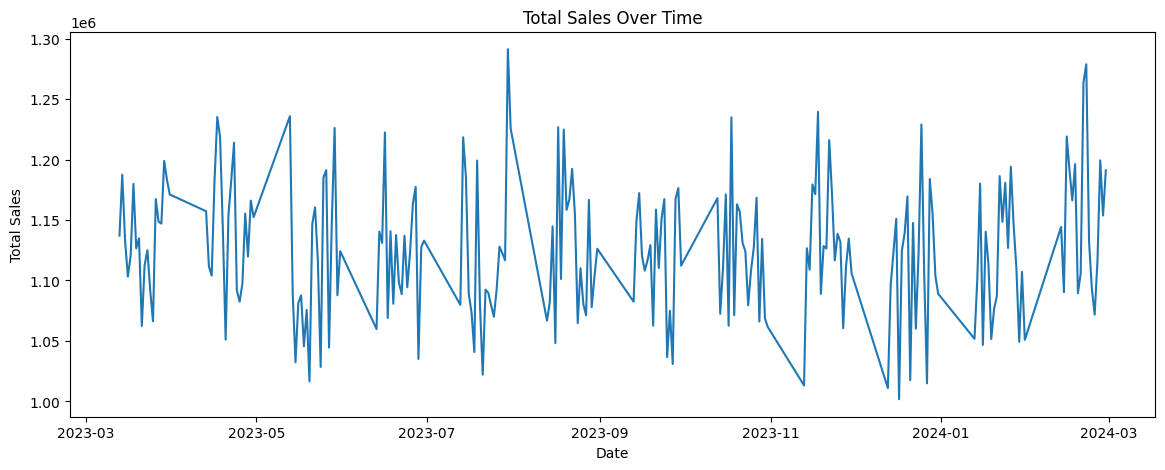

In [18]:
if 'Total_Amount' in df.columns:
    df_daily = df.groupby('Date')['Total_Amount'].sum().reset_index()
    plt.figure(figsize=(14, 5))
    sns.lineplot(data=df_daily, x='Date', y='Total_Amount')
    plt.title("Total Sales Over Time")
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.show()

In [19]:
critical_cols = ['Transaction_ID', 'Customer_ID', 'Date', 'Amount']
df = df.dropna(subset=critical_cols)

# Option B: Fill optional columns
df['Ratings'].fillna(df['Ratings'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Feedback'].fillna('Unknown', inplace=True)

In [20]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

In [21]:
df = df[df['Date'].notnull()]

In [22]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()

In [23]:
df['Phone'] = df['Phone'].astype('Int64')
df['Zipcode'] = df['Zipcode'].astype('Int64')
df['Customer_ID'] = df['Customer_ID'].astype('Int64')

In [32]:
def clean_income(val):
    if isinstance(val, str):
        income_map = {'Low': 1, 'Medium': 2, 'High': 3}
        val = val.strip()
        if val in income_map:
            return income_map[val]
        else:
            try:
                return float(val.replace('$', '').replace(',', ''))
            except ValueError:
                return np.nan
    return val




In [33]:
df['Income'] = df['Income'].apply(clean_income)


In [34]:
cat_cols = ['Gender', 'Country', 'Payment_Method', 'Shipping_Method', 'Order_Status']
for col in cat_cols:
    df[col] = df[col].str.strip().str.title()


In [35]:
print("\n🔹 Cleaned Shape:", df.shape)
print("Remaining Missing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))



🔹 Cleaned Shape: (182274, 32)
Remaining Missing Values:
 Name               242
Phone              222
Total_Purchases    210
Shipping_Method    207
Total_Amount       207
Email              205
Time               200
Zipcode            198
Payment_Method     189
Address            187
dtype: int64


In [39]:
df.to_csv('D:\\internship EY\\cleaned_retail_data.csv', index=False)
print("\n Cleaned data saved to 'cleaned_retail_data.csv'")


 Cleaned data saved to 'cleaned_retail_data.csv'


In [40]:
country_sales = df.groupby('Country')['Total_Amount'].sum().sort_values(ascending=False)


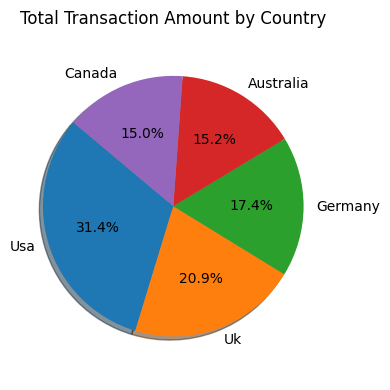

In [48]:
plt.figure(figsize=(4, 4))
plt.pie(
    country_sales,
    labels=country_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title("Total Transaction Amount by Country")
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.tight_layout()
plt.show()

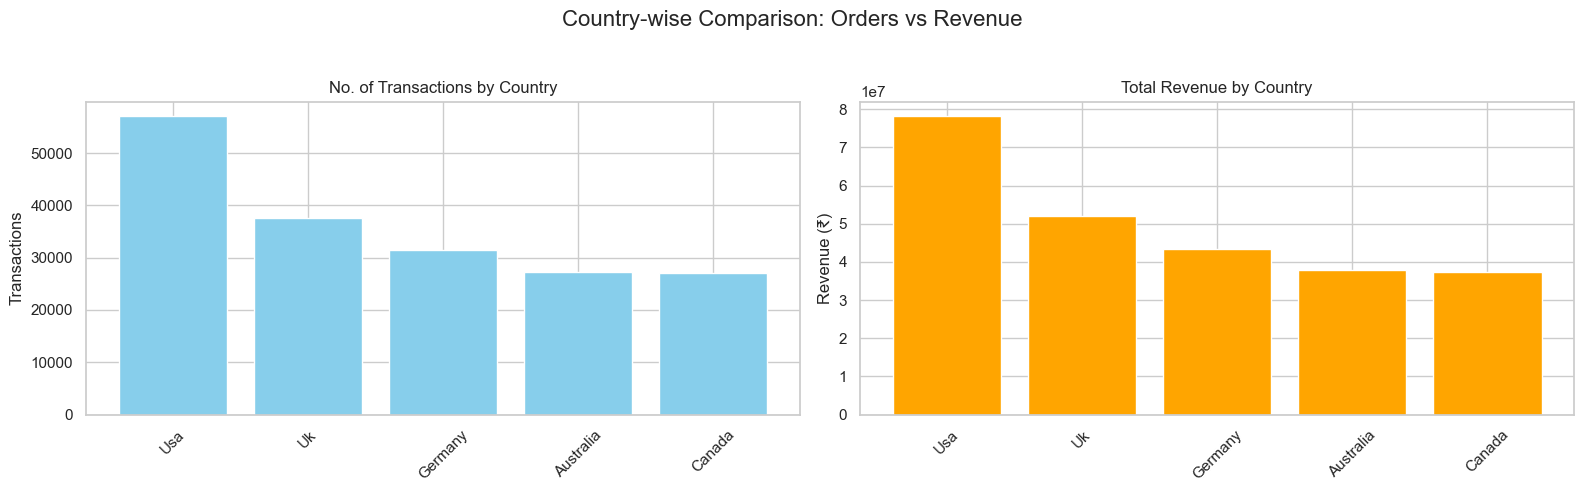

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data
country_group = df.groupby('Country').agg({
    'Transaction_ID': 'nunique',
    'Total_Amount': 'sum'
}).rename(columns={'Transaction_ID': 'No_of_Transactions'})

# Sort by revenue
country_group = country_group.sort_values(by='Total_Amount', ascending=False)

# Plot side-by-side using subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

# 1️⃣ Bar plot for Number of Transactions
ax1.bar(country_group.index, country_group['No_of_Transactions'], color='skyblue')
ax1.set_title("No. of Transactions by Country", fontsize=12)
ax1.set_ylabel("Transactions")
ax1.tick_params(axis='x', rotation=45)

# 2️⃣ Bar plot for Total Revenue
ax2.bar(country_group.index, country_group['Total_Amount'], color='orange')
ax2.set_title("Total Revenue by Country", fontsize=12)
ax2.set_ylabel("Revenue (₹)")
ax2.tick_params(axis='x', rotation=45)

# Layout and spacing
plt.suptitle("Country-wise Comparison: Orders vs Revenue", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for super title
plt.show()


In [ ]:

if 'Income_Level' not in df.columns and 'Income' in df.columns:
    income_map = {'Low': 1, 'Medium': 2, 'High': 3}
    df['Income_Level'] = df['Income'].map(income_map)

# Pivot 1: Country vs Gender
gender_counts = df.pivot_table(index='Country', columns='Gender', aggfunc='size', fill_value=0)

# Pivot 2: Country vs Product Category
category_counts = df.pivot_table(index='Country', columns='Product_Category', aggfunc='size', fill_value=0)

# Pivot 3: Country vs Product Brand
brand_counts = df.pivot_table(index='Country', columns='Product_Brand', aggfunc='size', fill_value=0)

# Pivot 4: Country vs Product Type
type_counts = df.pivot_table(index='Country', columns='Product_Type', aggfunc='size', fill_value=0)

# Pivot 5: Country vs Income Level (average level)
income_avg = df.groupby('Country')['Income_Level'].mean().round(2)

# Combine into a summary report (you can use display() in Jupyter)
print("Country-wise Gender Distribution:\n", gender_counts)
print("\nCountry-wise Product Category Distribution:\n", category_counts)
print("\nCountry-wise Product Brand Distribution:\n", brand_counts.head())  # just top rows
print("\nCountry-wise Product Type Distribution:\n", type_counts.head())  # just top rows
print("\nAverage Income Level by Country:\n", income_avg)


Country-wise Gender Distribution:
 Gender     Female   Male
Country                 
Australia   10463  16998
Canada      10564  16849
Germany     12237  19575
Uk          14720  23227
Usa         20950  36525

Country-wise Product Category Distribution:
 Product_Category  Books  Clothing  Electronics  Grocery  Home Decor
Country                                                            
Australia          5096      4992         6847     5454        5043
Canada             4951      5112         6972     5406        4948
Germany            5914      5881         7743     6347        5901
Uk                 7040      7258         9147     7397        7073
Usa                9873      9892        12149    15751        9755

Country-wise Product Brand Distribution:
 Product_Brand  Adidas  Apple  Bed Bath & Beyond  BlueStar  Coca-Cola  \
Country                                                                
Australia        1716   1619               1670       245       1700   
Canada   

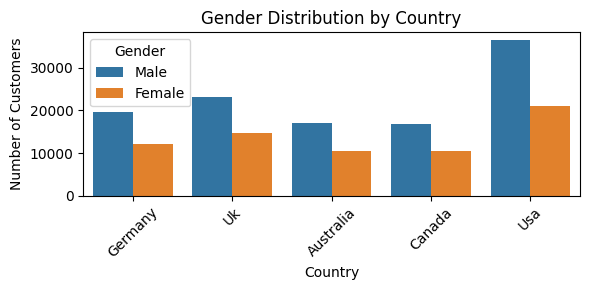

In [45]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Country', hue='Gender')
plt.title("Gender Distribution by Country")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

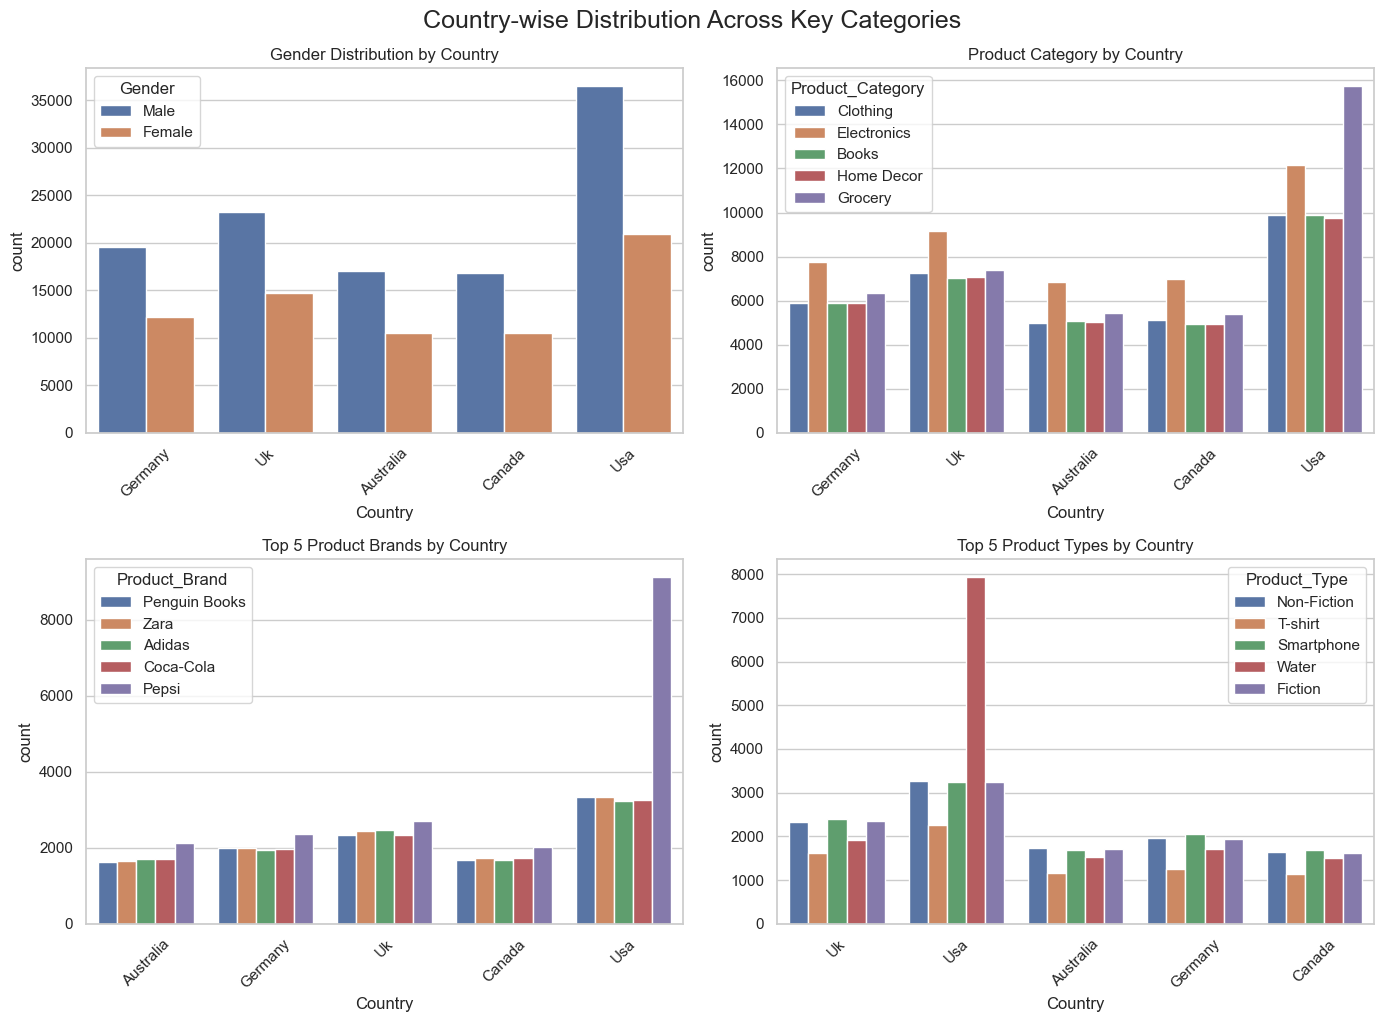

In [51]:

sns.set(style='whitegrid')

# Prepare filtered data for top categories to avoid clutter
top_brands = df['Product_Brand'].value_counts().nlargest(5).index
top_types = df['Product_Type'].value_counts().nlargest(5).index

filtered_df_brand = df[df['Product_Brand'].isin(top_brands)]
filtered_df_type = df[df['Product_Type'].isin(top_types)]

# Create subplots (2 rows × 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 layout

# 1️⃣ Gender by Country
sns.countplot(data=df, x='Country', hue='Gender', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution by Country')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2️⃣ Product Category by Country
sns.countplot(data=df, x='Country', hue='Product_Category', ax=axes[0, 1])
axes[0, 1].set_title('Product Category by Country')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3️⃣ Top Product Brands by Country
sns.countplot(data=filtered_df_brand, x='Country', hue='Product_Brand', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 Product Brands by Country')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4️⃣ Top Product Types by Country
sns.countplot(data=filtered_df_type, x='Country', hue='Product_Type', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 Product Types by Country')
axes[1, 1].tick_params(axis='x', rotation=45)

# Layout adjustments
plt.tight_layout()
plt.suptitle("Country-wise Distribution Across Key Categories", fontsize=18, y=1.02)
plt.show()

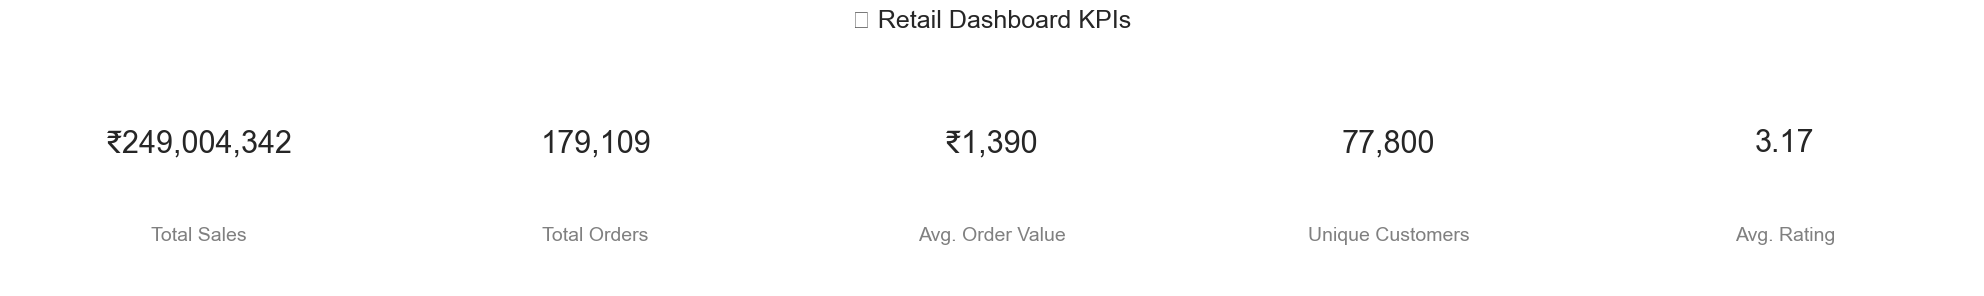

In [52]:
# Example KPI values (replace with actual values from your DataFrame)
total_sales = df['Total_Amount'].sum()
total_orders = df['Transaction_ID'].nunique()
avg_order_value = total_sales / total_orders
unique_customers = df['Customer_ID'].nunique()
avg_rating = df['Ratings'].mean()

# Create KPI cards using subplots
fig, ax = plt.subplots(1, 5, figsize=(20, 3))

kpis = {
    "Total Sales": f"₹{total_sales:,.0f}",
    "Total Orders": f"{total_orders:,}",
    "Avg. Order Value": f"₹{avg_order_value:,.0f}",
    "Unique Customers": f"{unique_customers:,}",
    "Avg. Rating": f"{avg_rating:.2f}"
}

for i, (title, value) in enumerate(kpis.items()):
    ax[i].text(0.5, 0.6, value, fontsize=22, ha='center')
    ax[i].text(0.5, 0.2, title, fontsize=14, ha='center', color='gray')
    ax[i].axis('off')

plt.suptitle("📊 Retail Dashboard KPIs", fontsize=18)
plt.tight_layout()
plt.show()


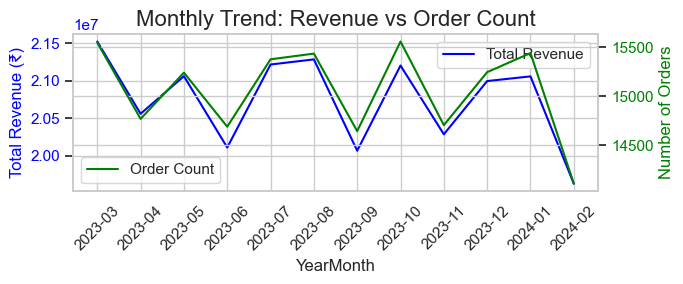

In [57]:
# ✅ Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 🗓️ Create Month-Year column
df['YearMonth'] = df['Date'].dt.to_period('M').astype(str) 

#  Group data by Month-Year
monthly_summary = df.groupby('YearMonth').agg({
    'Total_Amount': 'sum',
    'Transaction_ID': 'nunique'
}).reset_index().rename(columns={'Transaction_ID': 'Order_Count'})

# 🎨 Plot Revenue and Order Count on Dual Axis
fig, ax1 = plt.subplots(figsize=(7, 3))

# Line for Total Revenue
sns.lineplot(data=monthly_summary, x='YearMonth', y='Total_Amount', ax=ax1, label='Total Revenue', color='blue')
ax1.set_ylabel('Total Revenue (₹)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(monthly_summary['YearMonth'], rotation=45)

# Twin axis for Order Count
ax2 = ax1.twinx()
sns.lineplot(data=monthly_summary, x='YearMonth', y='Order_Count', ax=ax2, label='Order Count', color='green')
ax2.set_ylabel('Number of Orders', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 🎯 Titles and Legends
plt.title("Monthly Trend: Revenue vs Order Count", fontsize=16)
fig.tight_layout()
plt.show()


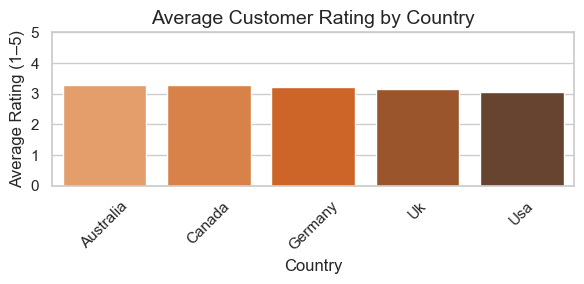

In [61]:
rating_by_country = df.groupby('Country')['Ratings'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(x=rating_by_country.index, y=rating_by_country.values, palette="Oranges_d")
plt.title("Average Customer Rating by Country", fontsize=14)
plt.ylabel("Average Rating (1–5)")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

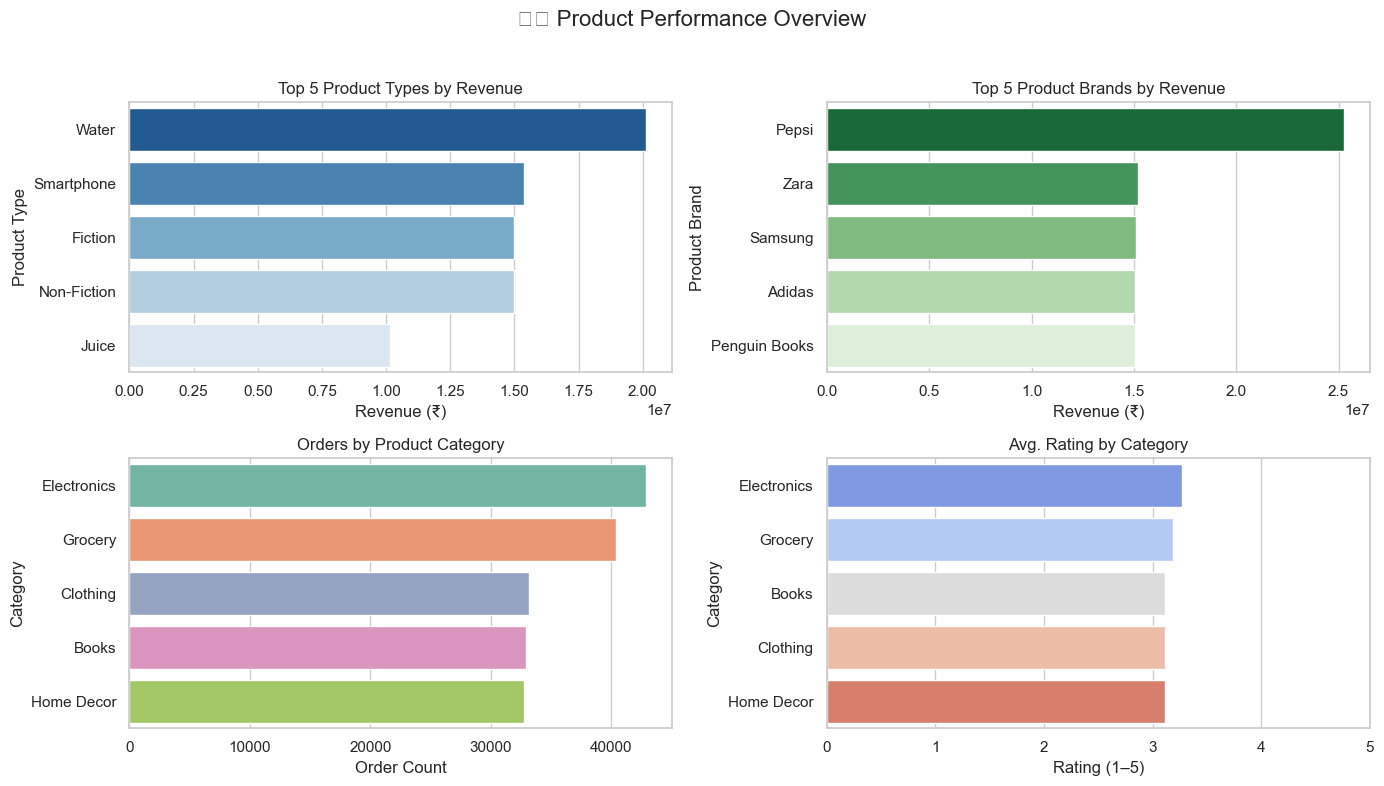

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Prepare data
top_types = df.groupby('Product_Type')['Total_Amount'].sum().sort_values(ascending=False).head(5)
top_brands = df.groupby('Product_Brand')['Total_Amount'].sum().sort_values(ascending=False).head(5)
category_orders = df['Product_Category'].value_counts()
category_ratings = df.groupby('Product_Category')['Ratings'].mean().sort_values(ascending=False)

# Set up 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 8))  # Slightly compact size

# 1️⃣ Top Product Types by Revenue
sns.barplot(x=top_types.values, y=top_types.index, ax=axes[0, 0], palette='Blues_r')
axes[0, 0].set_title("Top 5 Product Types by Revenue")
axes[0, 0].set_xlabel("Revenue (₹)")
axes[0, 0].set_ylabel("Product Type")

# 2️⃣ Top Product Brands by Revenue
sns.barplot(x=top_brands.values, y=top_brands.index, ax=axes[0, 1], palette='Greens_r')
axes[0, 1].set_title("Top 5 Product Brands by Revenue")
axes[0, 1].set_xlabel("Revenue (₹)")
axes[0, 1].set_ylabel("Product Brand")

# 3️⃣ Orders by Product Category
sns.barplot(x=category_orders.values, y=category_orders.index, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title("Orders by Product Category")
axes[1, 0].set_xlabel("Order Count")
axes[1, 0].set_ylabel("Category")

# 4️⃣ Avg. Rating by Category
sns.barplot(x=category_ratings.values, y=category_ratings.index, ax=axes[1, 1], palette='coolwarm')
axes[1, 1].set_title("Avg. Rating by Category")
axes[1, 1].set_xlabel("Rating (1–5)")
axes[1, 1].set_ylabel("Category")
axes[1, 1].set_xlim(0, 5)

# Adjust layout
plt.suptitle("🛍️ Product Performance Overview", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


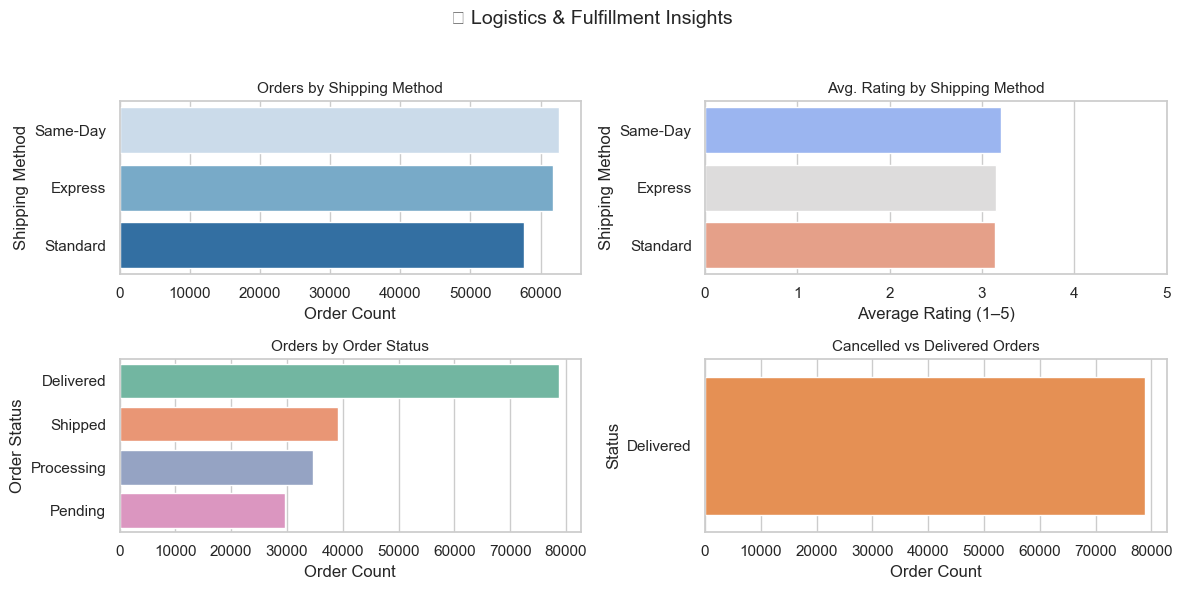

In [64]:
sns.set(style="whitegrid")

# Prepare data
shipping_counts = df['Shipping_Method'].value_counts()
shipping_ratings = df.groupby('Shipping_Method')['Ratings'].mean().sort_values(ascending=False)
status_counts = df['Order_Status'].value_counts()
cancel_vs_delivered = df[df['Order_Status'].isin(['Cancelled', 'Delivered'])]['Order_Status'].value_counts()

# Subplots layout: 2 rows × 2 columns (slightly smaller)
fig, axes = plt.subplots(2, 2, figsize=(12, 6))  # ⬅️ Reduced from (14, 8)

# 1️⃣ Orders by Shipping Method
sns.barplot(x=shipping_counts.values, y=shipping_counts.index, ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title("Orders by Shipping Method", fontsize=11)
axes[0, 0].set_xlabel("Order Count")
axes[0, 0].set_ylabel("Shipping Method")

# 2️⃣ Avg. Ratings by Shipping Method
sns.barplot(x=shipping_ratings.values, y=shipping_ratings.index, ax=axes[0, 1], palette="coolwarm")
axes[0, 1].set_title("Avg. Rating by Shipping Method", fontsize=11)
axes[0, 1].set_xlabel("Average Rating (1–5)")
axes[0, 1].set_xlim(0, 5)
axes[0, 1].set_ylabel("Shipping Method")

# 3️⃣ Order Count by Order Status
sns.barplot(x=status_counts.values, y=status_counts.index, ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Orders by Order Status", fontsize=11)
axes[1, 0].set_xlabel("Order Count")
axes[1, 0].set_ylabel("Order Status")

# 4️⃣ Cancelled vs Delivered Orders
sns.barplot(x=cancel_vs_delivered.values, y=cancel_vs_delivered.index, ax=axes[1, 1], palette="Oranges")
axes[1, 1].set_title("Cancelled vs Delivered Orders", fontsize=11)
axes[1, 1].set_xlabel("Order Count")
axes[1, 1].set_ylabel("Status")

# Layout formatting
plt.suptitle("🚚 Logistics & Fulfillment Insights", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


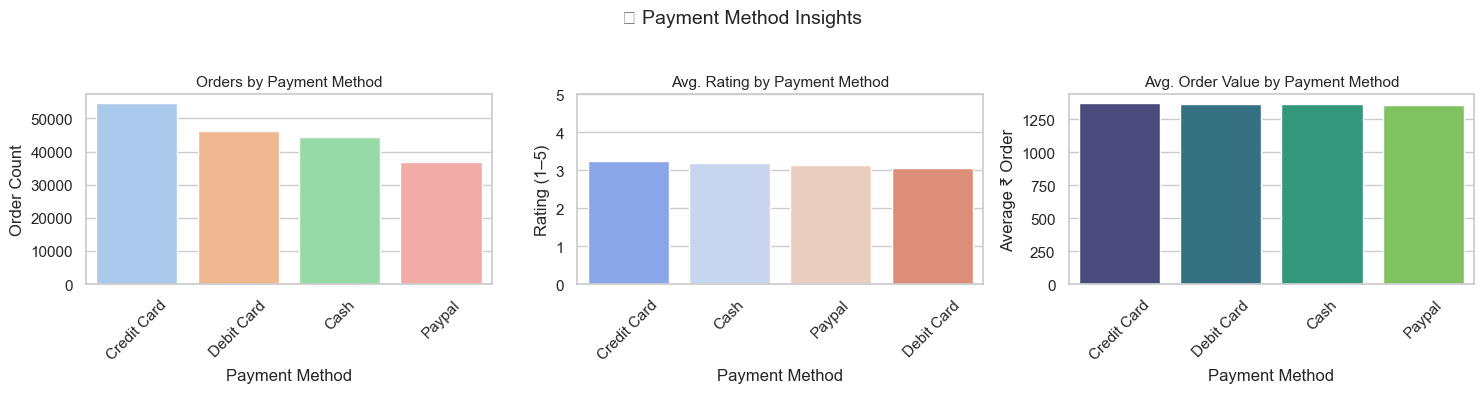

In [65]:
sns.set(style="whitegrid")

# Prepare metrics
payment_counts = df['Payment_Method'].value_counts()
payment_ratings = df.groupby('Payment_Method')['Ratings'].mean().sort_values(ascending=False)
payment_avg_order_value = df.groupby('Payment_Method')['Total_Amount'].mean().sort_values(ascending=False)

# 1 row × 3 columns layout
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1️⃣ Order Count by Payment Method
sns.barplot(x=payment_counts.index, y=payment_counts.values, ax=axes[0], palette='pastel')
axes[0].set_title("Orders by Payment Method", fontsize=11)
axes[0].set_ylabel("Order Count")
axes[0].set_xlabel("Payment Method")
axes[0].tick_params(axis='x', rotation=45)

# 2️⃣ Avg. Rating by Payment Method
sns.barplot(x=payment_ratings.index, y=payment_ratings.values, ax=axes[1], palette='coolwarm')
axes[1].set_title("Avg. Rating by Payment Method", fontsize=11)
axes[1].set_ylabel("Rating (1–5)")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylim(0, 5)
axes[1].tick_params(axis='x', rotation=45)

# 3️⃣ Avg. Order Value by Payment Method
sns.barplot(x=payment_avg_order_value.index, y=payment_avg_order_value.values, ax=axes[2], palette='viridis')
axes[2].set_title("Avg. Order Value by Payment Method", fontsize=11)
axes[2].set_ylabel("Average ₹ Order")
axes[2].set_xlabel("Payment Method")
axes[2].tick_params(axis='x', rotation=45)

# Final layout
plt.suptitle("💳 Payment Method Insights", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
